In [1]:
!pip install pandas tqdm

## Importación de librerías y rutas

In [2]:
# LIBRERÍAS
import pandas as pd
import os
import zipfile
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image

# RUTAS
BASE_PATH = "../data"
TRAIN_DIR = f"{BASE_PATH}/train_set"
VAL_DIR = f"{BASE_PATH}/val_set"
TEST_DIR = f"{BASE_PATH}/test_set"

TRAIN_CSV = f"{BASE_PATH}/train_labels.csv"
VAL_CSV = f"{BASE_PATH}/val_labels.csv"

## Identificación y descompresión de archivos ZIP

In [3]:
# IDENTIFICAR .ZIP
archivos_comprimidos = [os.path.join(BASE_PATH, archivo) for archivo in os.listdir(BASE_PATH) if archivo.endswith(".zip")]

# DESCOMPRIMIR SI CARPETAS NO EXISTEN
if archivos_comprimidos:
    for archivo in archivos_comprimidos:
        nombre_carpeta = os.path.splitext(os.path.basename(archivo))[0]  # Obtener el nombre base de la carpeta
        carpeta_destino = os.path.join(BASE_PATH, nombre_carpeta)

        if not os.path.exists(carpeta_destino):  # Verificar si ya está descomprimida
            print(f"Descomprimiendo: {archivo}")
            with zipfile.ZipFile(archivo, 'r') as zip_ref:
                lista_archivos = zip_ref.namelist()
                for file in tqdm(lista_archivos, desc=f"Progreso descomprimiendo {os.path.basename(archivo)}", unit="archivo"):
                    zip_ref.extract(file, BASE_PATH)
            print(f"Archivo {archivo} descomprimido correctamente en {carpeta_destino}.")
        else:
            print(f"La carpeta '{carpeta_destino}' ya existe. Omite la descompresión.")
else:
    print("No se encontraron archivos ZIP en la carpeta de datos.")

Descomprimiendo: ../data\test_set.zip


Progreso descomprimiendo test_set.zip: 100%|██████████████████████████████| 28378/28378 [00:18<00:00, 1570.10archivo/s]


Archivo ../data\test_set.zip descomprimido correctamente en ../data\test_set.
Descomprimiendo: ../data\train_set.zip


Progreso descomprimiendo train_set.zip: 100%|███████████████████████████| 118476/118476 [01:22<00:00, 1428.59archivo/s]


Archivo ../data\train_set.zip descomprimido correctamente en ../data\train_set.
Descomprimiendo: ../data\val_set.zip


Progreso descomprimiendo val_set.zip: 100%|███████████████████████████████| 11995/11995 [00:08<00:00, 1485.05archivo/s]

Archivo ../data\val_set.zip descomprimido correctamente en ../data\val_set.


## Lectura de archivos CSV

In [4]:
# LEER .CSV
try:
    train_df = pd.read_csv(TRAIN_CSV)
    val_df = pd.read_csv(VAL_CSV)

    print(f"Primeras filas del dataset de entrenamiento:")
    print(train_df.head())
    print(f"Total de imágenes de entrenamiento: {len(train_df)}")
    print(f"Total de imágenes de validación: {len(val_df)}")
except FileNotFoundError as e:
    print(f"Error al leer los CSV: {e}")


Primeras filas del dataset de entrenamiento:
           img_name  label
0  train_101733.jpg    211
1  train_101734.jpg    211
2  train_101735.jpg    211
3  train_101736.jpg    211
4  train_101737.jpg    211
Total de imágenes de entrenamiento: 118475
Total de imágenes de validación: 11994


## Creación de un diccionario de clases

In [5]:
# ASIGNAMOS LOS NOMBRES DE LAS CLASES A LOS NUMÉROS
clases_df_path = f"{BASE_PATH}/class_list.txt"

clases_df = pd.read_csv(clases_df_path, sep=" ", header=None, names=["etiqueta", "nombre_clase"])
clases_df['etiqueta'] = clases_df['etiqueta'].astype(int)

# Creamso diccionario
etiqueta_a_clase = dict(zip(clases_df['etiqueta'], clases_df['nombre_clase']))
    
print("Primeras filas del DataFrame de clases:")
clases_df.head()
print("Diccionario de clases:")
etiqueta_a_clase

Primeras filas del DataFrame de clases:
Diccionario de clases:


{0: 'macaron',
 1: 'beignet',
 2: 'cruller',
 3: 'cockle_food',
 4: 'samosa',
 5: 'tiramisu',
 6: 'tostada',
 7: 'moussaka',
 8: 'dumpling',
 9: 'sashimi',
 10: 'knish',
 11: 'croquette',
 12: 'couscous',
 13: 'porridge',
 14: 'stuffed_cabbage',
 15: 'seaweed_salad',
 16: 'chow_mein',
 17: 'rigatoni',
 18: 'beef_tartare',
 19: 'cannoli',
 20: 'foie_gras',
 21: 'cupcake',
 22: 'osso_buco',
 23: 'pad_thai',
 24: 'poutine',
 25: 'ramen',
 26: 'pulled_pork_sandwich',
 27: 'bibimbap',
 28: 'chicken_kiev',
 29: 'apple_pie',
 30: 'risotto',
 31: 'fruitcake',
 32: 'chop_suey',
 33: 'haggis',
 34: 'scrambled_eggs',
 35: 'frittata',
 36: 'scampi',
 37: 'sushi',
 38: 'orzo',
 39: 'fritter',
 40: 'nacho',
 41: 'beef_stroganoff',
 42: 'beef_wellington',
 43: 'spring_roll',
 44: 'savarin',
 45: 'crayfish_food',
 46: 'souffle',
 47: 'adobo',
 48: 'streusel',
 49: 'deviled_egg',
 50: 'escargot',
 51: 'club_sandwich',
 52: 'carrot_cake',
 53: 'falafel',
 54: 'farfalle',
 55: 'terrine',
 56: 'poached_eg

## Visualización de clases más frecuentes

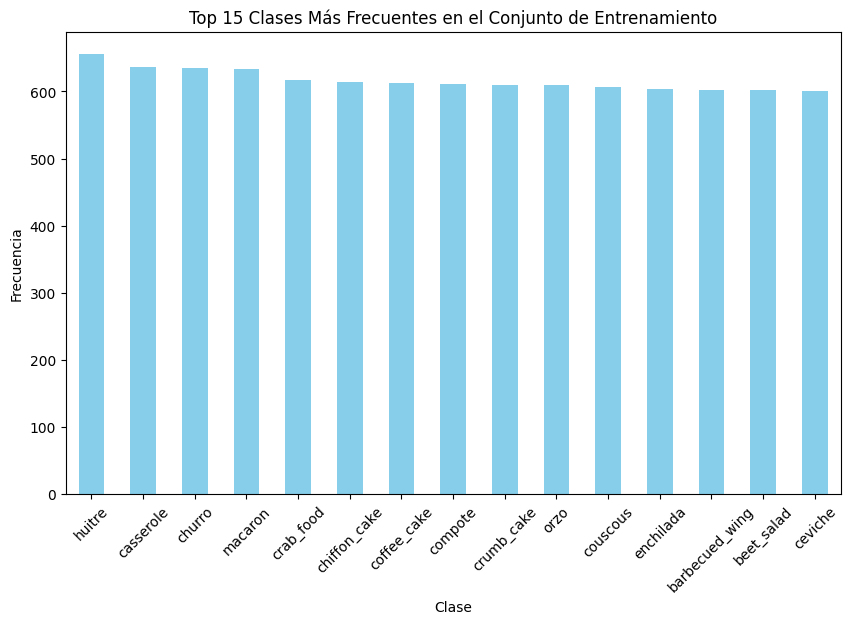

In [6]:
# CLASES MÁS FRECUENTES
top_15_clases = train_df['label'].map(etiqueta_a_clase).value_counts().head(15)

plt.figure(figsize=(10, 6))
top_15_clases.plot(kind='bar', color='skyblue')
plt.title("Top 15 Clases Más Frecuentes en el Conjunto de Entrenamiento")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.show()